LinkdeIn Connection Analysis 

This report is on analysis of my LinkedIn Connections. The analysis covers target areas such as what kind of companies my connections work for, what kind of roles my connections work in, my connections over time, and more.

In [ ]:
# Install library to share your visualization

#!pip3 install -U datapane

In [ ]:
!datapane login --server=https://datapane.com/ --token=bab2643e89718f573850d62356b8654176094fb4


Logged in to https://datapane.com/ as lisa


In [ ]:
import pandas as pd 
import numpy as np 
import plotly.express as px
import plotly.graph_objects as go
import datapane as dp
from pathlib import Path
import pandas_profiling
from pandas_profiling import ProfileReport


/usr/local/lib/python3.6/dist-packages/distributed/config.py:20: YAMLLoadWarning:

calling yaml.load() without Loader=... is deprecated, as the default Loader is unsafe. Please read https://msg.pyyaml.org/load for full details.

/usr/local/lib/python3.6/dist-packages/statsmodels/tools/_testing.py:19: FutureWarning:

pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.



In [ ]:
# Import data


network = pd.read_csv('Connections.csv')
network.head(5)

,First Name,Last Name,Email Address,Company,Position,Connected On
0,Ali,Jafri,NaN,"University of California, Berkeley",Research Assistant,20 Aug 2020
1,Dasani,Madipalli,NaN,Microsoft,Program Manager Dynamics 365 Supply Chain Mana...,19 Aug 2020
2,Stephen,Curry,NaN,BioMarin Pharmaceutical Inc.,MSAT - Process Modeling,18 Aug 2020
3,Vivian,Hung,NaN,BioMarin Pharmaceutical Inc.,Intern,18 Aug 2020
4,Annika,Sabaratnam,NaN,BioMarin Pharmaceutical Inc.,"Global Quality Communications, Reporting & Pro...",18 Aug 2020


In [ ]:
figs = []

figs.append(dp.Markdown('# LinkedIn Network'))
figs.append(dp.Table(network.head(5)))

In [ ]:
network.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 322 entries, 0 to 321
Data columns (total 6 columns):
 #   Column         Non-Null Count  Dtype 
---  ------         --------------  ----- 
 0   First Name     322 non-null    object
 1   Last Name      322 non-null    object
 2   Email Address  10 non-null     object
 3   Company        305 non-null    object
 4   Position       305 non-null    object
 5   Connected On   322 non-null    object
dtypes: object(6)
memory usage: 15.2+ KB


In [ ]:
network.describe()

,First Name,Last Name,Email Address,Company,Position,Connected On
count,322,322,10,305,305,322
unique,296,257,10,223,243,181
top,Pooja,Patel,parmarparth913@gmail.com,BioMarin Pharmaceutical Inc.,Product Manager,10 Aug 2020
freq,5,27,1,15,7,11


In [ ]:
import datetime

def convert(date):
    return datetime.datetime.strptime(date, "%d %b %Y").strftime("%Y-%m-%d")

network["Connected On"] = network["Connected On"].apply(convert)

In [ ]:


profile = ProfileReport(network, title='LinkedIn Profiling Report',html={'style': {'full_width': True}}, sort="None")
profile

In [ ]:
network = network.sort_values(by='Connected On')

In [ ]:
connections_line = px.line(network.groupby(by='Connected On').count().reset_index(), 
                           x="Connected On", 
                           y="First Name", 
                           labels={'First Name': 'Number'},
                           title='My Connections')
connections_line.show()

In [ ]:
figs.append(dp.Plot(connections_line))

In [ ]:
company_groupby = network.groupby(by='Company').count().reset_index().sort_values(by='First Name', ascending=False).reset_index(drop=True)
company_groupby

,Company,First Name,Last Name,Email Address,Position,Connected On
0,BioMarin Pharmaceutical Inc.,15,15,0,15,15
1,Santa Clara University,9,9,1,9,9
2,Microsoft,8,8,0,8,8
3,Santa Clara University Leavey School of Business,7,7,0,7,7
4,Gilead Sciences,7,7,0,7,7
...,...,...,...,...,...,...
218,Hexagon Innovations Pvt Ltd,1,1,0,1,1
219,HiTech iSolutions LLP,1,1,0,1,1
220,Hitech Projects Pvt Ltd,1,1,0,1,1
221,Hyundai Motor Company,1,1,0,1,1


In [ ]:
fig = px.bar(company_groupby[:200],
      x='Company',
      y='First Name',
      labels={'First Name': 'Number'})
fig

In [ ]:
figs.append(dp.Plot(fig))

In [ ]:
fig = px.treemap(company_groupby[:100], path=['Company', 'Position'],
          values='First Name',
          labels={'First Name': 'Number'})
fig

In [ ]:
figs.append(dp.Plot(fig))

In [ ]:
##FRirst Name

In [ ]:
fig = px.bar(network.groupby(by='Last Name').count().sort_values(by='First Name', ascending=False).reset_index()[:100],
      x='Last Name',
      y='First Name')
fig

In [ ]:
figs.append(dp.Plot(fig))

In [ ]:
#Position

In [ ]:
network['Position'].value_counts()[network['Position'].value_counts()/len(network) * 100 > 0.5]

Product Manager                         7
Data Analyst                            6
Software Engineer                       6
Intern                                  5
Software Engineer Intern                5
Data Science Intern                     5
Practicum Student                       4
Software Development Engineer           4
Product Management Intern               4
Program Manager                         4
Member                                  3
Senior Product Manager                  3
Graduate Research Assistant             3
Founder                                 3
Senior Software Engineer                2
Program Management Intern               2
Executive                               2
Business Analyst                        2
Graduate Engineering Trainee            2
Associate Product Manager               2
Business Operations Intern              2
Business Intelligence Engineer          2
Graduate Teaching Assistant             2
Research Assistant                

In [ ]:
fig = px.bar(network.groupby(by='Position').count().sort_values(by='First Name', ascending=False)[:10].reset_index(),
       x='Position',
       y='First Name',
       labels={'First Name': 'Number'},
        title= 'Positions in my LinkedIn Network'
      )

fig.show()

In [ ]:
figs.append(dp.Plot(fig))

In [ ]:
network.Position.str.startswith('Product Manager').sum()

12

In [ ]:
positions = ' '.join(network[~network.Position.isnull()].Position.unique())

In [ ]:
from wordcloud import WordCloud, STOPWORDS, ImageColorGenerator
import matplotlib.pyplot as plt
%matplotlib inline


def make_wordcloud(new_text):
    ''''function to make wordcloud'''
    
    wordcloud = WordCloud(width = 800, height = 800, 
                min_font_size = 10,
                background_color='black', 
                colormap='Set2', 
                collocations=False).generate(new_text) 
    
    #wordcloud.recolor(color_func = grey_color_func)

    
    fig = plt.figure(figsize = (8, 8), facecolor = None) 
    plt.imshow(wordcloud, interpolation='bilinear') 
    plt.axis("off") 
    plt.tight_layout(pad = 0) 

    plt.show() 
    
    return fig

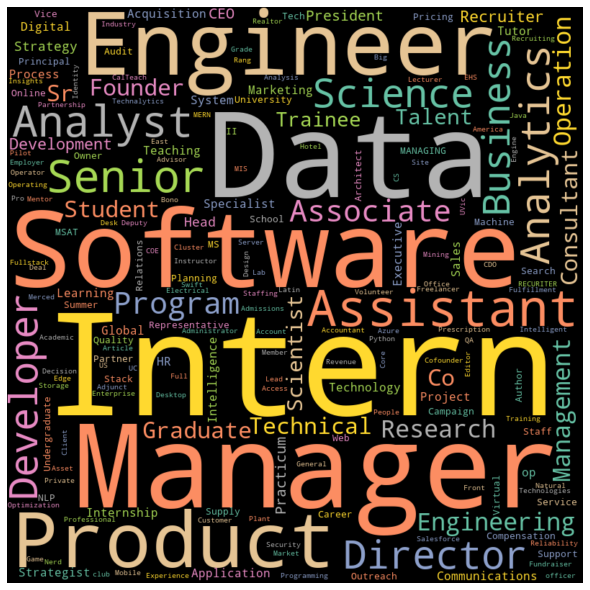

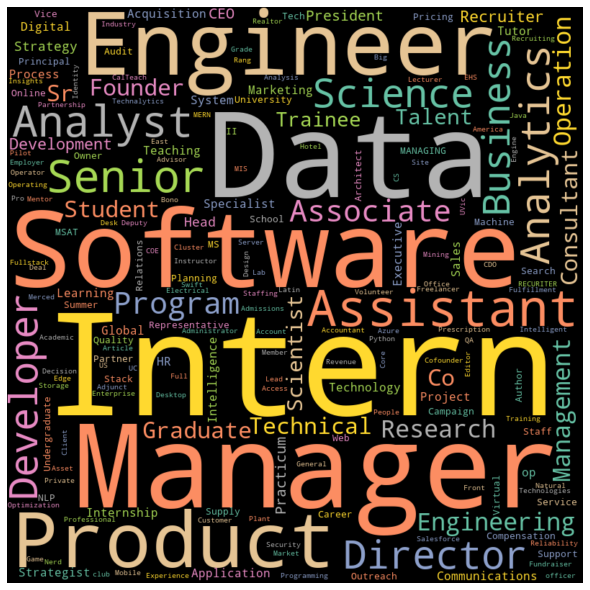

In [ ]:
wordcloud = make_wordcloud(positions)
wordcloud

In [ ]:
figs.append(dp.Plot(wordcloud))

In [ ]:
dp.Report(*figs).publish(name='Linkedin_network', open=True)

Publishing report and associated data - please wait..
Report successfully published at https://datapane.com/lisa/reports/Linkedin_network/
